# ZDO zadání 2020

* Navrhněte a naprogramujte nástroj pro měření pohybu zvířat v boxech.
* Vstupem jsou videa s pohledem shora
* Cílem je naměřit počet metrů, které zvíře ujde v určitém čase. 
* Polohu zvířat zaznamenávejte v metrech, čas v sekundách.
* Bonusová úloha je určení natočení zvířete

# Data

[data ke stažení naleznete zde](https://drive.google.com/drive/folders/1CCNoKKFSFHQfV4W0sm_Civ7pQ0IkElLB?usp=sharing)

## Rozdělení anotací 

Každá ze skupin má za úkol provedení anotace videí ze dvou kamer.

* Skupina 1
  * Kamera 1, videa 001 až 010
  * Kamera 2, videa 001 až 004
* Skupina 2
  * Kamera 1, videa 011 až 015
  * Kamera 2, videa 005 až 006
* Skupina 3
  * Kamera 1, videa 021 až 030
  * Kamera 2, videa 009 až 012

  

# Práce s videem

In [88]:
%pylab inline
import skimage
from skimage.io import imread
import cv2
from pathlib import Path
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


C:\Users\Jirik\Miniconda3\envs\scaffan\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['step', 'imread']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [99]:

# imread()

pth = Path('~/Downloads/zverinec02-006.mp4').expanduser()
cap = cv2.VideoCapture(str(pth))
# prostor pro inicializaci

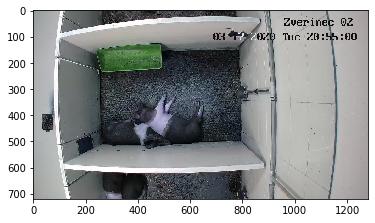

In [101]:
%matplotlib inline
ret, frame = cap.read()
plt.imshow(frame)

In [76]:
step = 25 # read every 10th step

cap = cv2.VideoCapture(str(pth))
frames = []
amount_of_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
print(f"amount_of_frames={amount_of_frames}")

for frame_number in range(0, int(amount_of_frames), step):
    cap.set(cv2.CAP_PROP_POS_FRAMES, int(frame_number-1))
    res, frame = cap.read()
    frames.append(frame)
cap.release()
cv2.destroyAllWindows()

amount_of_frames=1293.0


In [40]:
# # Alternative reading
# while(cap.isOpened()):
#     ret, frame = cap.read()
#     # gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#     # zde místo pro práci s každým snímkem
#     # cv2.imshow('frame',gray)
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break
# cap.release()
# cv2.destroyAllWindows()

# Anotace

* Pozice prasete je dána bodem mezi předníma nohama na spojnici ramen zvířete.
* Dodržujte ID zvířete. Na všech framech musí být první zvíře vždy označováno jako první.
* Výstup je v XLSX formátu, případně v CSV
* Pravým tlačítkem myši lze bod odebrat
* Prostředním tlačítkem myši se ukončuje zadávání a dojde ke zobrazení dalšího snímku

## Ukázka na jednom snímku

In [102]:
%matplotlib qt
plt.figure(figsize=[15,10])
plt.imshow(frame)
points = plt.ginput(-1)
points

[]

In [60]:
pth.parts[-1]

('C:\\', 'Users', 'Jirik', 'Downloads', 'zverinec02-005.mp4')

## Anotace celého videa

In [85]:
%matplotlib qt
annotation={
    "filename": [], # pth.parts[-1]
    "frame_id": [],
    "animal_id": [],
    "x_px": [],
    "y_px": [],
    "annotation_timestamp": [],
}
plt.figure(figsize=[15,10])
for i, frame in enumerate(frames[3:9]):
    plt.imshow(frame)
    plt.draw()
    points = plt.ginput(-1)
    
    for j, point in enumerate(points):
        annotation["filename"].append(pth.parts[-1])
        annotation["frame_id"].append(i * step)
        annotation["animal_id"].append(j)
        annotation["x_px"].append(point[0])
        annotation["y_px"].append(point[1])
        annotation["annotation_timestamp"].append(str(pd.Timestamp.now()))
        
df_one_video = pd.DataFrame(annotation) 
df_one_video

,filename,frame_id,animal_id,x_px,y_px,annotation_timestamp
0,zverinec02-006.mp4,0,0,458.281362,415.769534,2020-03-18 18:39:55.207252
1,zverinec02-006.mp4,50,0,462.869176,415.769534,2020-03-18 18:40:33.730191
2,zverinec02-006.mp4,50,1,433.813023,489.174552,2020-03-18 18:40:33.730191
3,zverinec02-006.mp4,75,0,468.986260,411.181720,2020-03-18 18:40:36.832799
4,zverinec02-006.mp4,75,1,484.278973,493.762366,2020-03-18 18:40:36.832799
5,zverinec02-006.mp4,100,0,468.986260,417.298805,2020-03-18 18:40:40.028756
6,zverinec02-006.mp4,100,1,479.691159,492.233094,2020-03-18 18:40:40.028756
7,zverinec02-006.mp4,125,0,468.986260,414.240263,2020-03-18 18:40:43.502014
8,zverinec02-006.mp4,125,1,482.749701,493.762366,2020-03-18 18:40:43.502014


## Vizualizace pomocí `seaborn`

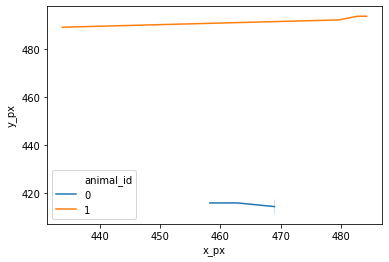

In [91]:
sns.lineplot(data=df_one_video, x="x_px", y="y_px",hue="animal_id")

In [72]:
annotation

{'filename': 'zverinec02-005.mp4',
 'frame_id': 100,
 'animal_id': 1,
 'x_px': [],
 'y_px': [],
 'x': 524.0400238948625,
 'y': 437.17933094384705}

 ## Uložení do souboru

In [69]:
ann_fn = Path("annotation.xlsx")
sheet_name = "Sheet1"
if ann_fn.exists():
    dfold = pd.read_excel(str(ann_fn), sheet_name=sheet_name)
        # dfout = pd.concat([dfin, df], axis=0, ignore_index=True)
    dfcombine = dfold.append(df_one_video, ignore_index=True, sort=True)
    dfcombine.to_excel(str(ann_fn), sheet_name=sheet_name, index=False)
else:
    df_one_video.to_excel(ann_fn, index=False, sheet_name=sheet_name)
    

'2020-03-18 18:33:54.220918'

# Návrh

* Limity
* Požadované vstupy
* Návrh API